In [6]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
%matplotlib inline

# Загружаем датасет

In [7]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

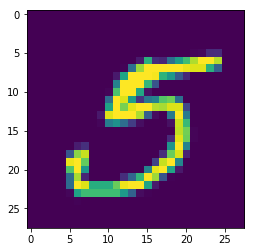

In [8]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][1].reshape(28,28))

# Обучаем модель

In [14]:
# Реализуйте здесь обучение модели


# нормировка
mean = np.mean(train['data'], axis=1, keepdims = True)
std = np.std(train['data'], axis=1, keepdims = True)
X = (train['data'] - mean) / (std + 0.000001)
y = (train['labels'] - 5.5) * 2

print (y)

print (X.shape[0], X.shape[1])
print ('yshape = %s' % (y.shape[0]))

# добавляем единичную колонку для w0
X = np.hstack([ np.ones((X.shape[0], 1)), X])
print ('xshape[0] = %s, xshape[1] = %s' % (X.shape[0], X.shape[1]))

#print(X[1])

# Инициализируем веса случайны образом
np.random.seed(198)
w = np.random.normal(scale=0.001, size = X.shape[1])

#print (w)

#print (w.shape, X[3].shape)

vsegoEpochs = 500
L = [0]*vsegoEpochs
epochNumber = 0
for iter in tqdm.tqdm_notebook(range(vsegoEpochs)):
    l = 0
    for i in range (1000) :     #epoch
        j = np.random.randint(0, X.shape[0])
        #print ('pokazatel` = %s' % np.dot(w.T, X[i]))
        pok = y[i] * np.dot(w.T, X[i])
        if (pok > 500) : 
            pok = 500
        exponent = math.exp(pok)
        
        grad = - (y[i] * X[i]) / (1 + exponent) + 0.01 * w
        #grad = - (y[i] * X[i]) / (1 + math.exp(y[i] * np.dot(w.T, X[i]))) + 0.1 * w
        w = w - 0.001 * grad
        l = l + 0
    L[epochNumber] = l / 1000
    epochNumber = epochNumber + 1
        
#print (L)
#plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k')

asixX = np.linspace (0, vsegoEpochs, vsegoEpochs)
plt.plot(asixX, L, 'o', label='sample')
plt.legend()
        
i = 0
nTrue = 0
for i in range(y.shape[0]) :
    if (  ((y[i] < 0) and (np.dot(w.T, X[i]) < 0)) or ((y[i] > 0) and (np.dot(w.T, X[i]) > 0))  ):
        nTrue = nTrue + 1

print ('success : %s out of 10000' % (nTrue))
    
    
    
    
    
    
    
    

[-1. -1.  1. ...  1. -1.  1.]
10000 784
yshape = 10000
xshape[0] = 10000, xshape[1] = 785


KeyboardInterrupt: 

# Оцениваем результат

Обязательно отрисуйте 2 графика:
- loss на обучающем и тестовом множесте
- % правильно классифицированных примеров на тестовом и обучающем множестве

NameError: name 'tr_eval' is not defined

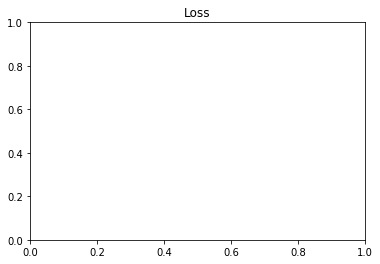

In [5]:
plt.title('Loss')
plt.plot([e[0] for e in tr_eval], label='train')
plt.plot([e[0] for e in te_eval], label='test')
plt.legend()

In [ ]:
plt.title('Acc')
plt.plot([e[1] for e in tr_eval], label='train')
plt.plot([e[1] for e in te_eval], label='test')
plt.legend()

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

Результат записывается в простой текстовый файл. Первая строчка "Id,Prediction", далее для каждого примера из валидационного множества записывается его Id (порядковый номер, с нуля) и вероятность принадлежности к классу '6', например '123,0.12'.

Важно соблюдать тот же порядок следования элементов, что и в наборе данных. Нумерация id с 0

In [ ]:
X = test_no_lables['data']

# compute Y_pred

with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(len(test['labels'])):
        print(i, Y_pred[i], sep=',', file=fout)

# Сдача

1. Регистрируетесь на конкурс https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528 
1. Преодолеваете "Pass level" baseline
1. После того, как вы преодолеете baseline, присылайте ноутбук с решение по адресу **voropaev@corp.mail.ru**

# Внимание
- Пишите тему письм в формате "[МИФИ][1] Фамилия"
- Внутри писма прикрепляете файл ноутбука с именем family.ipynb
- Обязательно указывайте ваш ник на kaggle